In [11]:
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import pandas as pd

import os

In [2]:
files = {'ST1R-PDX': '/omics/groups/OE0540/internal/projects/przybilm/medulloblastoma/revision/scrna_analysis/scanpy/ST1R-PDX_Aurelie_Celltype_scanpy.h5ad',
         'ST1R-Nuclei': '/omics/groups/OE0540/internal/projects/przybilm/medulloblastoma/revision/scrna_analysis/scanpy/ST1R-Nuclei_Aurelie_Celltype_scanpy.h5ad',
         'STP-Nuclei': '/omics/groups/OE0540/internal/projects/przybilm/medulloblastoma/revision/scrna_analysis/scanpy/STP-Nuclei_Aurelie_Celltype_scanpy.h5ad',
         'STP-PDX':'/omics/groups/OE0540/internal/projects/przybilm/medulloblastoma/revision/scrna_analysis/scanpy/STP-PDX_Aurelie_Celltype_scanpy.h5ad',
         'MB243-Nuclei':'/omics/groups/OE0540/internal/projects/przybilm/medulloblastoma/revision/scrna_analysis/scanpy/MB243-Nuclei_Aurelie_Celltype_scanpy.h5ad',
         'RCMB18':'/omics/groups/OE0540/internal/projects/przybilm/medulloblastoma/revision/scrna_analysis/scanpy/RCMB18-PDX_Celltype_scanpy.h5ad',
         'BT084':'/omics/groups/OE0540/internal/projects/przybilm/medulloblastoma/revision/scrna_analysis/scanpy/BT084-PDX_Celltype_scanpy.h5ad'}

In [3]:
adatas = {}
for sample, filepath in files.items():
    adatas[sample] = sc.read_h5ad(filepath)



ST1R-PDX
ST1R-Nuclei
STP-Nuclei
STP-PDX
MB243-Nuclei
RCMB18
BT084


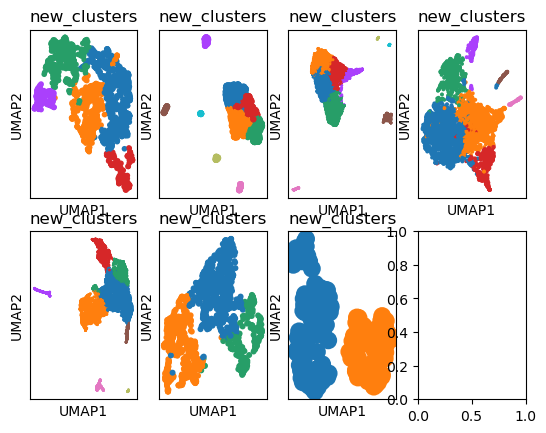

In [4]:
fig, axes = plt.subplots(2,4)
axes = axes.flatten()
for i, sample in enumerate(adatas):
    adata = adatas[sample]
    print(sample)
    sc.pl.umap(adata, color='new_clusters', ax=axes[i], show=False, legend_loc=None)

In [5]:
for i, sample in enumerate(adatas):
    adata = adatas[sample]
    outframe = pd.DataFrame({'umap1': adata.obsm['X_umap'][:,0], 'umap2': adata.obsm['X_umap'][:,1], 'Celltype': adata.obs['new_clusters']})
    outframe.to_csv(f'/home/p163v/scDNASeq_natgen_notebooks/source_data_files/{sample}_celltype_umap.csv')

Now lets add the DNA clone annotations

In [21]:
adata.obs

,sample,technology,patient,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,louvain,leiden,new_clusters
AAACGGGCACGGATAG-1,BT084,PDX,BT084,1702,1698,9788.0,716.0,7.315080,3529.0,36.054352,0,cluster0,malignant ribosomal
AAAGTAGAGTCGCCGT-1,BT084,PDX,BT084,1672,1667,5345.0,280.0,5.238541,1731.0,32.385406,0,cluster0,malignant ribosomal
AAATGCCGTAGCGATG-1,BT084,PDX,BT084,2848,2834,19103.0,1868.0,9.778569,7593.0,39.747681,0,cluster0,malignant ribosomal
AACACGTAGTCTCCTC-1,BT084,PDX,BT084,2300,2295,7250.0,490.0,6.758621,1733.0,23.903448,0,cluster0,malignant ribosomal
AACCATGAGCTACCTA-1,BT084,PDX,BT084,2312,2308,8877.0,702.0,7.908077,2714.0,30.573391,1,cluster1,malignant cycling
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTTAGGTGGTCCGT-1,BT084,PDX,BT084,2697,2691,11221.0,678.0,6.042242,3098.0,27.608950,0,cluster0,malignant ribosomal
TTGAACGGTCGATTGT-1,BT084,PDX,BT084,3781,3778,23033.0,1559.0,6.768549,6531.0,28.354969,1,cluster1,malignant cycling
TTGTAGGCACTACAGT-1,BT084,PDX,BT084,4641,4548,24405.0,929.0,3.806597,4924.0,20.176193,1,cluster1,malignant cycling
TTTCCTCGTAAGTAGT-1,BT084,PDX,BT084,3464,3441,22847.0,1753.0,7.672780,7412.0,32.441895,0,cluster0,malignant ribosomal


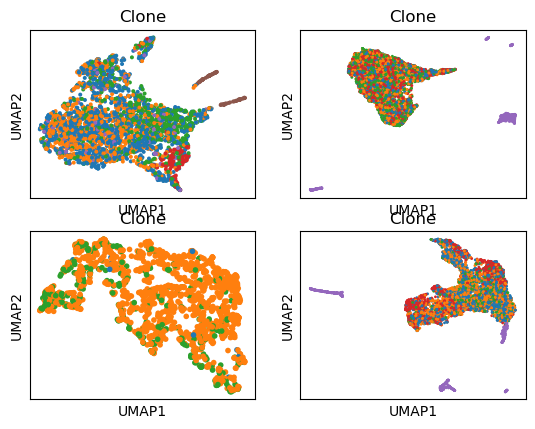

In [39]:
clone_alignment = {}
fig, axes = plt.subplots(2,2)
axes = axes.flatten()

for i, sample in enumerate(['STP-PDX','STP-Nuclei','ST1R-PDX','MB243-Nuclei']):
    adata = adatas[sample]
    clone_alignment[sample] = pd.read_table(f'~/groups/OE0540/internal/projects/przybilm/medulloblastoma/revision/scrna_analysis/infercnv_MB/scRNA_scDNA/{sample}_clones/{sample}_clones_scDNA_clones_filtered_cells.txt')
    adata.obs["Clone"] = "Unaligned/Normal"
    adata.obs.loc[clone_alignment[sample].Cell_barcode,'Clone'] = clone_alignment[sample]["clone_id"].values
    sc.pl.umap(adata, color='Clone', ax=axes[i], show=False, legend_loc=None)
    outframe = pd.DataFrame({'umap1': adata.obsm['X_umap'][:,0], 'umap2': adata.obsm['X_umap'][:,1], 'Celltype': adata.obs['Clone']})
    outframe.to_csv(f'/home/p163v/scDNASeq_natgen_notebooks/source_data_files/{sample}_clone_umap.csv')    


In [5]:
adata_nuclei = sc.read_h5ad('/omics/groups/OE0540/internal/projects/przybilm/medulloblastoma/revision/scrna_analysis/scanpy/adata_nuclei_Celltype.h5ad')


In [6]:
adata_nuclei

AnnData object with n_obs × n_vars = 15265 × 4622
    obs: 'sample', 'technology', 'patient', 'scrublet__predicted_multiplet', 'scrublet__multiplet_scores', 'scrublet__multiplet_zscores', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'louvain', 'leiden', 'Cell_types'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'ribo', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Cell_types_colors', 'hvg', 'leiden', 'leiden_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [7]:
meta_out = adata_nuclei.obs
meta_out.to_csv(f'/home/p163v/scDNASeq_natgen_notebooks/source_data_files/nuclei_metadata.csv')    

In [8]:
meta_out

,sample,technology,patient,scrublet__predicted_multiplet,scrublet__multiplet_scores,scrublet__multiplet_zscores,batch,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,louvain,leiden,Cell_types
AAACCTGCACATCCAA-1-0,STP,Nuclei,ST,False,0.215768,-9.569958,0,521,520,660.0,0.0,0.000000,19.0,2.878788,0,cluster1,Malignant SHH II
AAACCTGCACTAGTAC-1-0,STP,Nuclei,ST,False,0.134111,-17.467151,0,567,566,753.0,2.0,0.265604,9.0,1.195219,0,cluster1,Malignant SHH II
AAACCTGCATCATCCC-1-0,STP,Nuclei,ST,False,0.081828,-30.576015,0,424,424,548.0,3.0,0.547445,36.0,6.569343,0,cluster1,Malignant SHH II
AAACCTGGTAGCGATG-1-0,STP,Nuclei,ST,False,0.248260,-7.865708,0,3130,3129,6149.0,7.0,0.113840,83.0,1.349813,2,cluster2,Malignant SHH II
AAACCTGGTAGCTCCG-1-0,STP,Nuclei,ST,False,0.155340,-14.623827,0,472,472,596.0,1.0,0.167785,12.0,2.013423,0,cluster1,Malignant SHH II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTTCCTCCA-1-2,MB243,Nuclei,MB243,False,0.187500,-8.151105,2,2020,2020,3162.0,2.0,0.063251,27.0,0.853890,1,cluster0,Malignant SHH I
TTTGTCATCAATCACG-1-2,MB243,Nuclei,MB243,False,0.090526,-20.546005,2,3786,3786,7859.0,5.0,0.063621,40.0,0.508971,5,cluster5,Malignant Cycling
TTTGTCATCCCAACGG-1-2,MB243,Nuclei,MB243,False,0.220472,-6.393604,2,2499,2499,4407.0,5.0,0.113456,28.0,0.635353,1,cluster3,Malignant Neuronal Development I
TTTGTCATCGCTTGTC-1-2,MB243,Nuclei,MB243,False,0.173770,-9.076989,2,924,924,1126.0,2.0,0.177620,10.0,0.888099,1,cluster0,Malignant SHH I


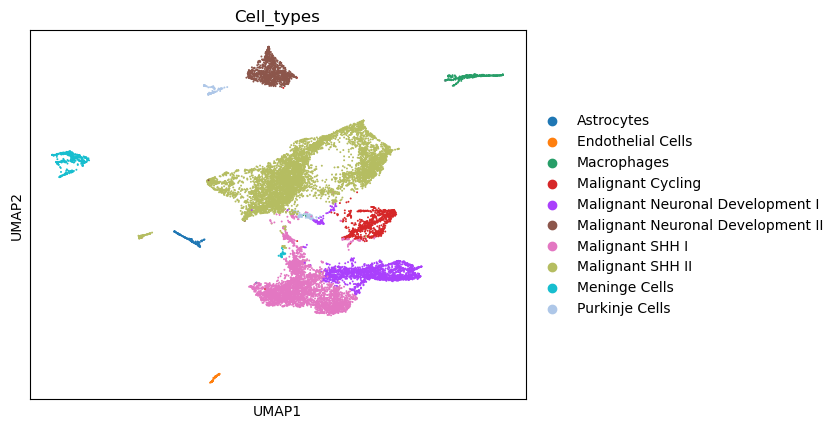

In [31]:
sc.pl.umap(adata_nuclei, color='Cell_types', show=True)

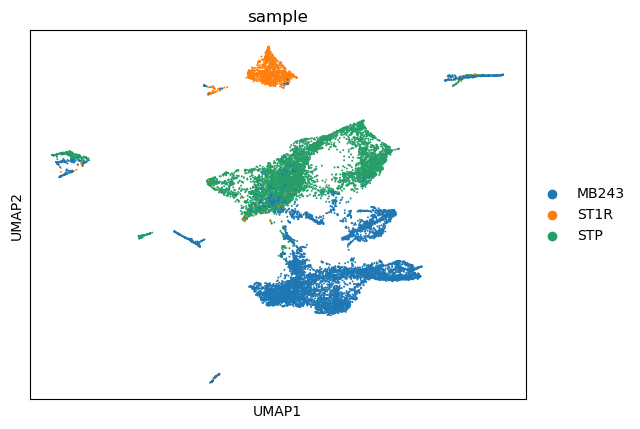

In [32]:
sc.pl.umap(adata_nuclei, color='sample', show=True)

In [83]:
dtplt_nuc = sc.pl.dotplot(adata_nuclei, 
              var_names=["SOX5", "ATP1A2", "NTRK2","GFAP","VWF","EGFL7","INSR","ANO2","CD74","SAT1","MERTK","MKI67","TOP2A","DIAPH3","POLQ","ASPM","MARCH1", "PLCL1","DPYD","NCAM2","ELN","RASGEF1B","SLC26A3","LINGO1","GLI2","POU6F2","CNTNAP5","CLASP1","ADAMTS6","MYO16","COL4A1","FN1","RBMS3","CDH11","NPAS3","PPP2R2B","LSAMP"], groupby='Cell_types', standard_scale='var', dot_max=1, 
              categories_order=['Purkinje Cells','Meninge Cells','Malignant SHH II','Malignant SHH I','Malignant Neuronal Development II','Malignant Neuronal Development I','Malignant Cycling','Macrophages','Endothelial Cells','Astrocytes'],
             return_fig=True)

In [84]:
dtplt_nuc.obs_tidy.to_csv('/home/p163v/scDNASeq_natgen_notebooks/source_data_files/Nuclei_dotplot_celltypes.csv')

In [34]:
outframe = pd.DataFrame({'umap1': adata_nuclei.obsm['X_umap'][:,0], 'umap2': adata_nuclei.obsm['X_umap'][:,1], 'Celltype': adata_nuclei.obs['Cell_types']})
outframe.to_csv(f'/home/p163v/scDNASeq_natgen_notebooks/source_data_files/nuclei_celltype_umap.csv')
outframe = pd.DataFrame({'umap1': adata_nuclei.obsm['X_umap'][:,0], 'umap2': adata_nuclei.obsm['X_umap'][:,1], 'sample': adata_nuclei.obs['sample']})
outframe.to_csv(f'/home/p163v/scDNASeq_natgen_notebooks/source_data_files/nuclei_sample_umap.csv')


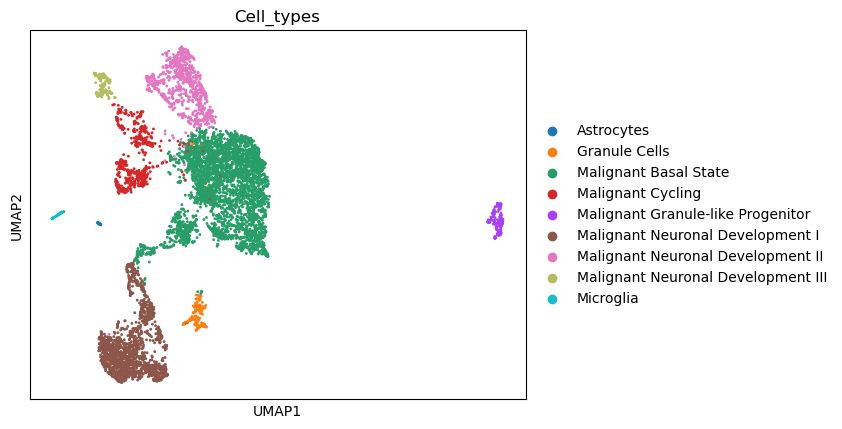

In [9]:
adata_pdx = sc.read_h5ad('/omics/groups/OE0540/internal/projects/przybilm/medulloblastoma/revision/scrna_analysis/PDX_Celltype_scanpy.h5ad')
sc.pl.umap(adata_pdx, color='Cell_types', show=True)

In [10]:
meta_out_pdx = adata_pdx.obs
meta_out_pdx.to_csv(f'/home/p163v/scDNASeq_natgen_notebooks/source_data_files/pdx_metadata.csv')    

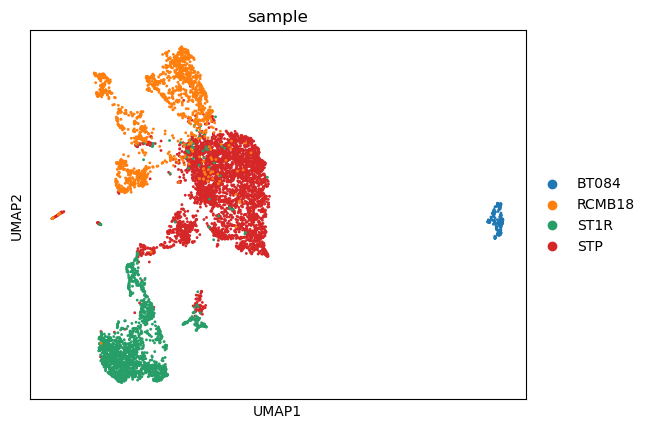

In [36]:
sc.pl.umap(adata_pdx, color='sample', show=True)

In [37]:
outframe = pd.DataFrame({'umap1': adata_pdx.obsm['X_umap'][:,0], 'umap2': adata_pdx.obsm['X_umap'][:,1], 'Celltype': adata_pdx.obs['Cell_types']})
outframe.to_csv(f'/home/p163v/scDNASeq_natgen_notebooks/source_data_files/pdx_celltype_umap.csv')
outframe = pd.DataFrame({'umap1': adata_pdx.obsm['X_umap'][:,0], 'umap2': adata_pdx.obsm['X_umap'][:,1], 'sample': adata_pdx.obs['sample']})
outframe.to_csv(f'/home/p163v/scDNASeq_natgen_notebooks/source_data_files/pdx_sample_umap.csv')

In [78]:
dtplt = sc.pl.dotplot(adata_pdx, 
              var_names=["FABP7", "CLU", "SLC1A3","PTN","C1orf61","GAP43","LTC4S","PTCH2","MKI67","TOP2A","MFAP4","TRIO","DAPL1","CHGA","CAMK2B","RBFOX3","CDKN2A", "GLI1","NEUROD1","FAM84A","TRIB2","DDX1","CD74","ZNF90","LYZ","CD81","SAT1"], groupby='Cell_types', standard_scale='var', dot_max=1, 
              # categories_order=['Purkinje Cells','Meninge Cells','Malignant SHH II','Malignant SHH I','Malignant Neuronal Development II','Malignant Neuronal Development I','Malignant Cycling','Macrophages','Endothelial Cells','Astrocytes'], 
                      return_fig=True
             )

In [82]:
dtplt.obs_tidy.to_csv('/home/p163v/scDNASeq_natgen_notebooks/source_data_files/PDX_dotplot_celltypes.csv')

In [72]:
pdx_expression = adata_pdx.raw[:,["FABP7", "CLU", "SLC1A3","PTN","C1orf61","GAP43","LTC4S","PTCH2","MKI67","TOP2A","MFAP4","TRIO","DAPL1","CHGA","CAMK2B","RBFOX3","CDKN2A", "GLI1","NEUROD1","FAM84A","TRIB2","DDX1","CD74","ZNF90","LYZ","CD81","SAT1"]].X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 40913 stored elements and shape (7226, 27)>

In [96]:
outframe = pd.DataFrame({'umap1': adatas['MB243'].obsm['X_umap'][:,0], 'umap2': adatas['MB243'].obsm['X_umap'][:,1], 'gli2': adatas['MB243'].raw[:,'GLI2'].X.toarray().reshape(-1)})
outframe.to_csv(f'/home/p163v/scDNASeq_natgen_notebooks/source_data_files/mb243_gli2_umap.csv')

In [97]:
outframe = pd.DataFrame({'umap1': adatas['STP-Nuclei'].obsm['X_umap'][:,0], 'umap2': adatas['STP-Nuclei'].obsm['X_umap'][:,1], 'gli2': adatas['STP-Nuclei'].raw[:,'GLI2'].X.toarray().reshape(-1)})
outframe.to_csv(f'/home/p163v/scDNASeq_natgen_notebooks/source_data_files/stp_nuc_gli2_umap.csv')

In [117]:
outframe = pd.DataFrame({'umap1': adatas['MB243'].obsm['X_umap'][:,0], 'umap2': adatas['MB243'].obsm['X_umap'][:,1], 'gli2': adatas['MB243'].raw[:,'SETD2'].X.toarray().reshape(-1)})
outframe.to_csv(f'/home/p163v/scDNASeq_natgen_notebooks/source_data_files/mb243_setd2_umap.csv')

In [118]:
outframe = pd.DataFrame({'umap1': adatas['STP-Nuclei'].obsm['X_umap'][:,0], 'umap2': adatas['STP-Nuclei'].obsm['X_umap'][:,1], 'gli2': adatas['STP-Nuclei'].raw[:,'SETD2'].X.toarray().reshape(-1)})
outframe.to_csv(f'/home/p163v/scDNASeq_natgen_notebooks/source_data_files/stp_nuc_setd2_umap.csv')

In [98]:
adata_vladiou = sc.read_h5ad('/omics/groups/OE0540/internal/projects/przybilm/medulloblastoma/revision/scrna_analysis/')

In [102]:
adata_vladiou.obs['sample']

AAACCTGAGACCTAGG-1-0    BT2017017_SHH
AAACCTGAGATGCCAG-1-0    BT2017017_SHH
AAACCTGAGGAACTGC-1-0    BT2017017_SHH
AAACCTGAGTTGAGTA-1-0    BT2017017_SHH
AAACCTGCACCAGCAC-1-0    BT2017017_SHH
                            ...      
TTTGGTTCAGGTTTCA-1-7     BT2017075_G4
TTTGTCACACATAACC-1-7     BT2017075_G4
TTTGTCATCGTACCGG-1-7     BT2017075_G4
TTTGTCATCGTTACAG-1-7     BT2017075_G4
TTTGTCATCTTGTTTG-1-7     BT2017075_G4
Name: sample, Length: 21311, dtype: category
Categories (8, object): ['BT2016012_G3', 'BT2016040_G4', 'BT2016137_G4', 'BT2017017_SHH', 'BT2017035_G4', 'BT2017075_G4', 'BT2018034_G3', 'SM4217_SHH']

In [106]:
adata_nuclei

AnnData object with n_obs × n_vars = 15265 × 4622
    obs: 'sample', 'technology', 'patient', 'scrublet__predicted_multiplet', 'scrublet__multiplet_scores', 'scrublet__multiplet_zscores', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'louvain', 'leiden', 'Cell_types'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'ribo', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Cell_types_colors', 'hvg', 'leiden', 'leiden_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [111]:
adata_vladiou

AnnData object with n_obs × n_vars = 21311 × 2145
    obs: 'sample', 'group', 'scrublet__predicted_multiplet', 'scrublet__multiplet_scores', 'scrublet__multiplet_zscores', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'louvain', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'ribo', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'group_colors', 'hvg', 'leiden', 'leiden_colors', 'louvain', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

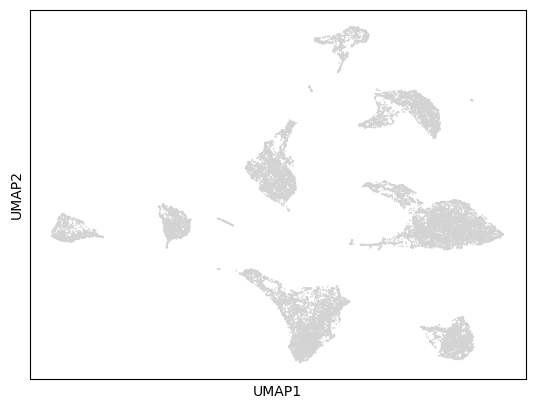

In [110]:
sc.pl.umap(adata_vladiou)

In [113]:
adata = adata_nuclei
adata_ref = adata_vladiou

var_names = adata_ref.var_names.intersection(adata.var_names)
adata_ref = adata_ref[:, var_names]
adata = adata[:, var_names]

sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)



/home/p163v/mambaforge/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:325: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca
/home/p163v/mambaforge/envs/scanpy/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [115]:
sc.tl.ingest(adata, adata_ref, obs='leiden')

/home/p163v/mambaforge/envs/scanpy/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
<frozen _collections_abc>:982: ImplicitModificationWarning: Setting element `.obsm['rep']` of view, initializing view as actual.
<frozen _collections_abc>:982: ImplicitModificationWarning: Setting element `.obsm['X_umap']` of view, initializing view as actual.
<frozen _collections_abc>:982: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.


/tmp/ipykernel_16708/1481914831.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_concat = adata_ref.concatenate(adata, batch_categories=["ref", "new"])


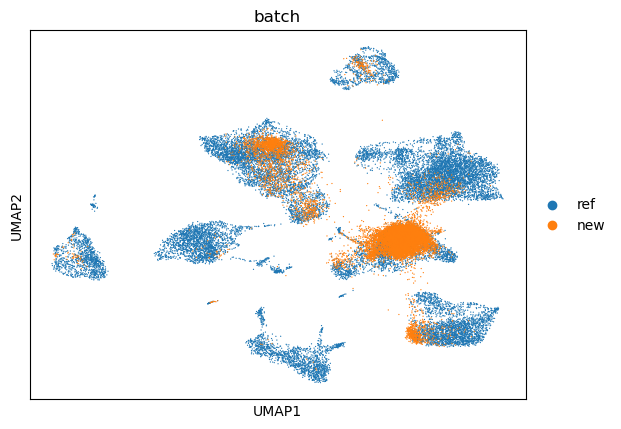

In [116]:
adata_concat = adata_ref.concatenate(adata, batch_categories=["ref", "new"])
sc.pl.umap(adata_concat, color=["batch"])


In [12]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]
            
        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]
            
        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

/tmp/ipykernel_3982/3001503681.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


matplotlib==3.9.2
numpy==1.26.4
pandas==2.2.2
scanpy==1.10.2


In [14]:
import sys
print(sys.version)

3.12.5 | packaged by conda-forge | (main, Aug  8 2024, 18:36:51) [GCC 12.4.0]
